<a href="https://colab.research.google.com/github/Ash100/Minor/blob/main/DataScience_Project_on_Agri_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A Complete DataScience Project For Environmental Data**

This project is prepared by **Dr. Ashfaq Ahmad**. I have used Air Quality Data of Islamabad City collected for the Year (2019-2023)

You can watch complete video tutorial of this session on [**Bioinformatics Insights**](https://youtu.be/qm7n8Fc8T74)

## **Exploratory Data Analysis - (EDA)**

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

# Load CSV
df = pd.read_csv('/content/Final Data.csv')

# Strip leading/trailing whitespaces in the Date column
df['Date'] = df['Date'].str.strip()

# Convert Date to datetime format, invalid dates will be set to NaT
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y', errors='coerce')

# Check for rows with NaT (invalid dates)
invalid_dates = df[df['Date'].isnull()]

# If any invalid dates, print them
if not invalid_dates.empty:
    print("Rows with invalid dates:\n", invalid_dates)

# Optionally: Save the cleaned data back to a new CSV
df.to_csv('cleaned_file.csv', index=False)

In [3]:
# Loading the dataset (Replace 'your_data.csv' with the actual file path)
df = pd.read_csv('/content/cleaned_file.csv')

In [ ]:
# Displaying the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

In [ ]:
# Basic information about the dataset
print("\nBasic info of the dataset:")
df.info()


Basic info of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37800 entries, 0 to 37799
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Variety          37800 non-null  object 
 1   Location         37800 non-null  object 
 2   Date             37800 non-null  object 
 3   temp             37800 non-null  float64
 4   dew              37800 non-null  float64
 5   humidity         37800 non-null  float64
 6   precip           37800 non-null  float64
 7   windspeed        37800 non-null  float64
 8   winddir          37800 non-null  float64
 9   cloudcover       37800 non-null  float64
 10  visibility       37800 non-null  float64
 11  solarradiation   37800 non-null  float64
 12  solarenergy      37800 non-null  float64
 13  uvindex          37800 non-null  int64  
 14  moonphase        37800 non-null  float64
 15  Diseaseseverity  37800 non-null  float64
dtypes: float64(12), int64(1), obje

In [ ]:
# Descriptive statistics
print("\nDescriptive statistics of the dataset:")
print(df.describe())

In [ ]:
# Checking for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

In [ ]:
# Check for any rows where the date could not be converted (NaT values)
invalid_dates = df[df['Date'].isnull()]
print(f"\nRows with invalid date format (NaT):\n{invalid_dates}")


Rows with invalid date format (NaT):
Empty DataFrame
Columns: [Variety, Location, Date, temp, dew, humidity, precip, windspeed, winddir, cloudcover, visibility, solarradiation, solarenergy, uvindex, moonphase, Diseaseseverity]
Index: []


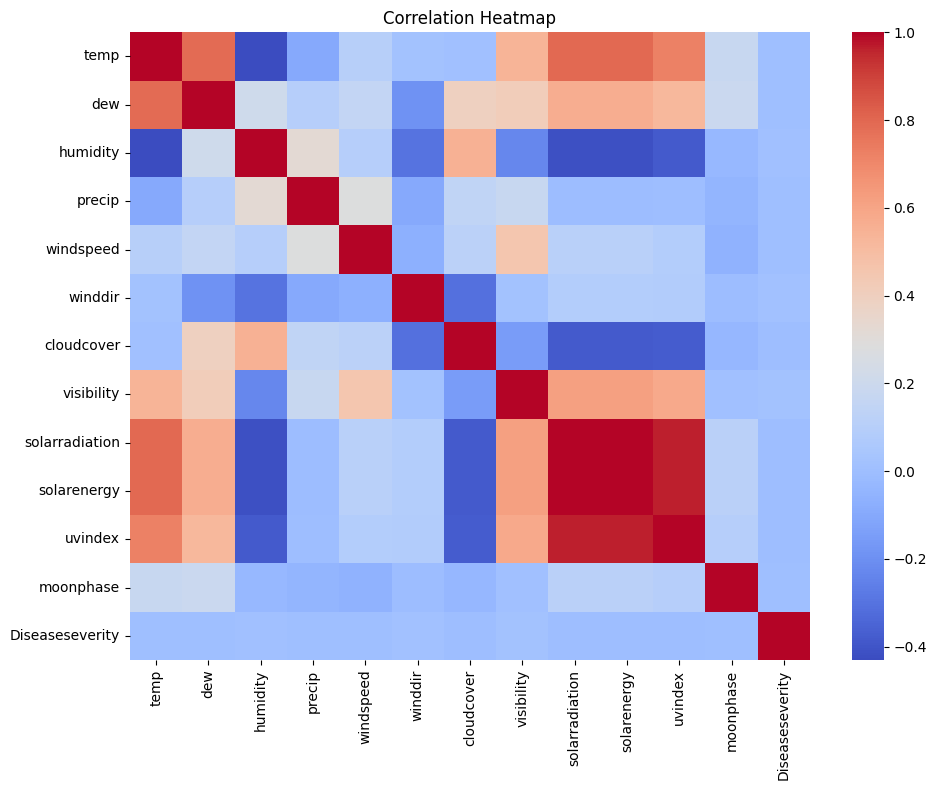

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop 'Varient', 'Location', and 'Date' columns
df_filtered = df.drop(columns=['Variety', 'Location', 'Date'])

# Keep only numeric columns for correlation
df_numeric = df_filtered.select_dtypes(include=['float64', 'int64'])

# 1. Correlation Heatmap without displaying values
plt.figure(figsize=(10,8))
sns.heatmap(df_numeric.corr(), annot=False, cmap='coolwarm')  # Set annot=False to hide values
plt.title("Correlation Heatmap")
# Adjust layout to avoid cutting off labels
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
# 2. Distribution of numerical features
num_features = ['temp', 'dew', 'humidity', 'precip', 'winddir', 'cloudcover', 'visibility', 'solarenergy', 'uvindex', 'moonphase', 'Diseaseseverity']

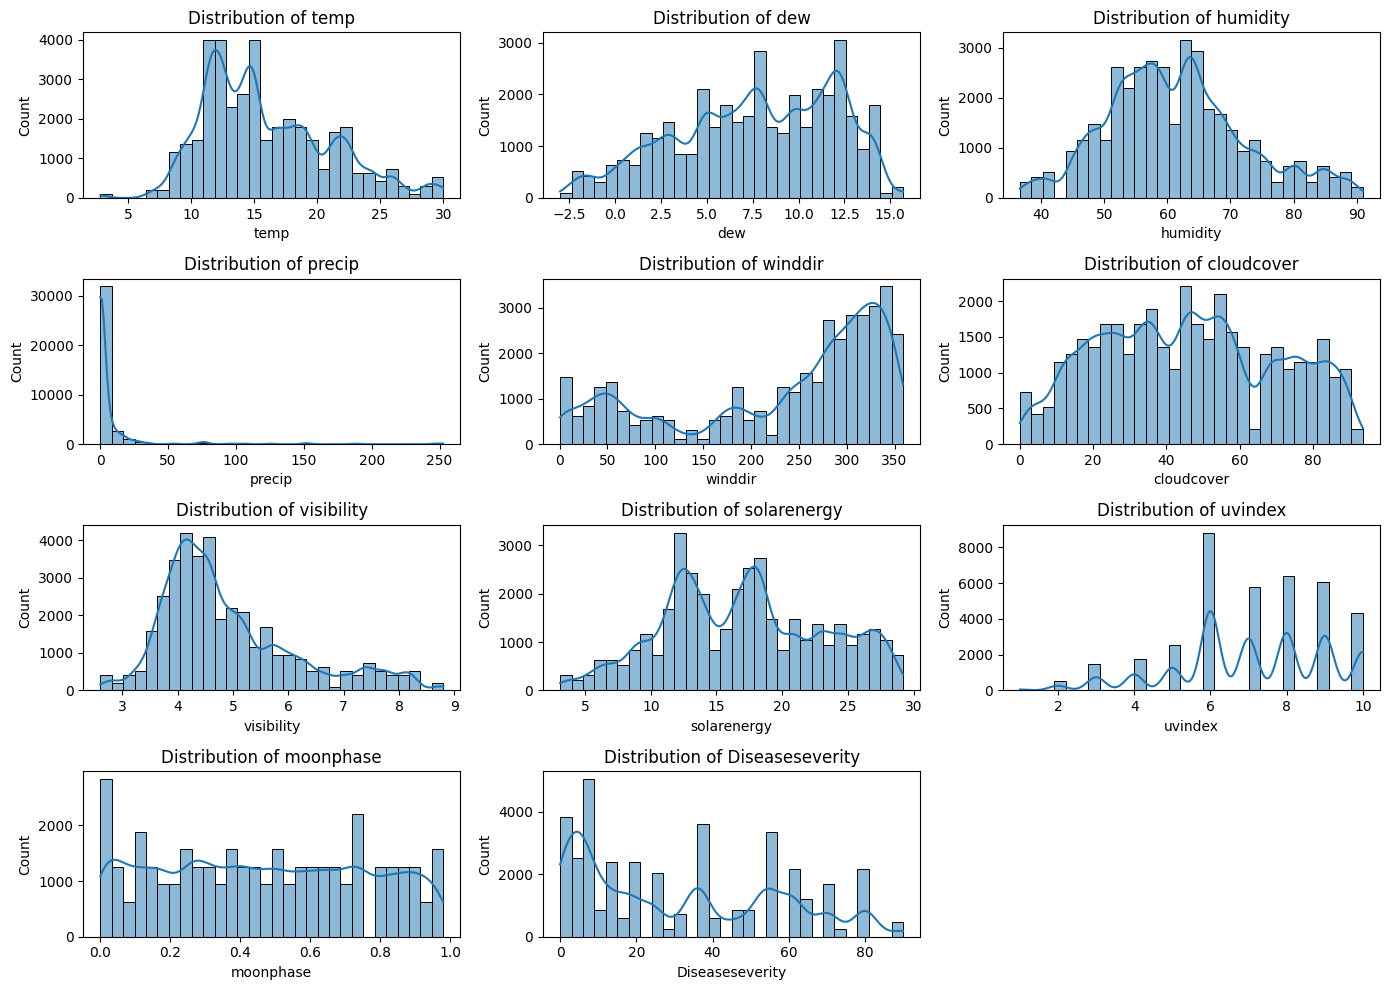

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'num_features' is defined and 'df' is your DataFrame with numeric features
# For example: num_features = ['Feature1', 'Feature2', 'Feature3', ..., 'Feature10']

plt.figure(figsize=(14, 10))
n_rows = 4  # Change to 4 rows
n_cols = 3  # Change to 3 columns
for i, feature in enumerate(num_features, 1):
    plt.subplot(n_rows, n_cols, i)  # Create a 4x3 grid of subplots
    sns.histplot(df[feature].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {feature}")

plt.tight_layout()

# Save the figure
plt.savefig('Data_Distribution.png', dpi=600, bbox_inches='tight')

# Display the plot
plt.show()

In [ ]:
# Print the columns of the DataFrame to check their names
print(df.columns)

Index(['Variety', 'Location', 'Date', 'temp', 'dew', 'humidity', 'precip',
       'windspeed', 'winddir', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'uvindex', 'moonphase', 'Diseaseseverity'],
      dtype='object')


<ipython-input-4-b85fe422a82b>:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = numeric_df.resample('M').mean()


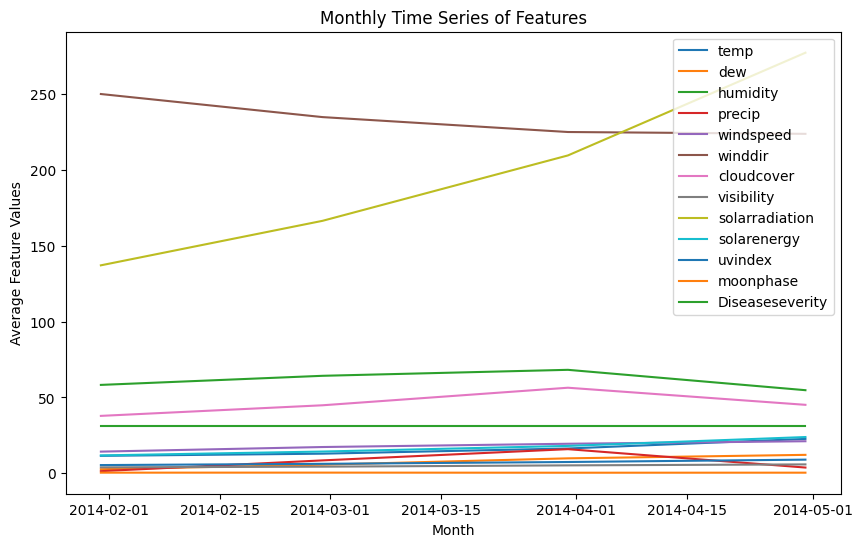

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/cleaned_file.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Select only numeric columns (exclude object columns like "Variety", "Location")
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Resample the data by month, aggregating with mean
monthly_df = numeric_df.resample('M').mean()

# Plot each feature as a time series (monthly)
plt.figure(figsize=(10, 6))
for feature in monthly_df.columns:
    plt.plot(monthly_df.index, monthly_df[feature], label=feature)

plt.title('Monthly Time Series of Features')
plt.xlabel('Month')
plt.ylabel('Average Feature Values')
plt.legend(loc='upper right')
plt.savefig('Monthly_time_series_of_features.png', dpi=600, bbox_inches='tight')
plt.show()


<ipython-input-5-d744c1908ed2>:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = numeric_df.resample('M').mean()


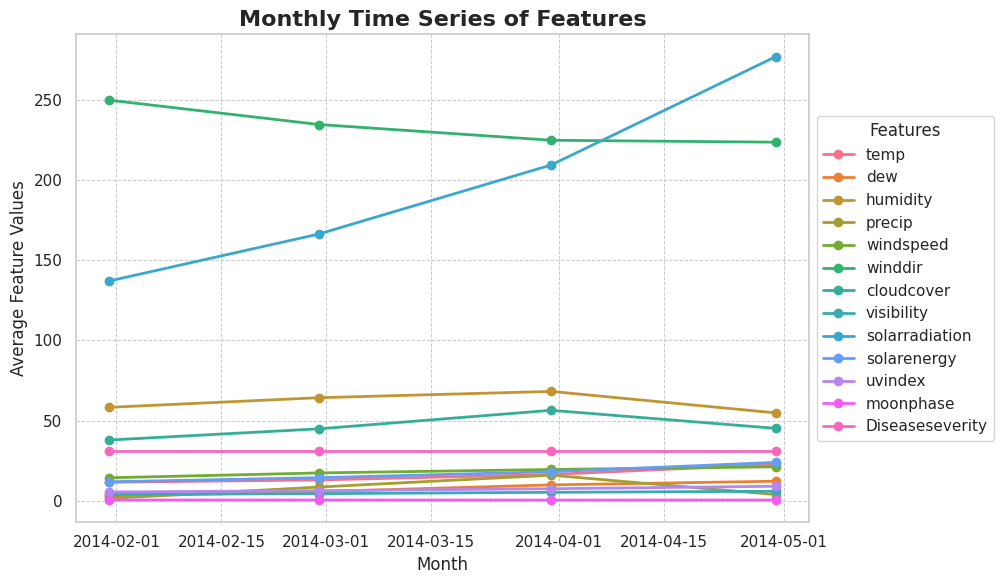

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the seaborn theme for better visuals
sns.set_theme(style="whitegrid")

# Load your dataset from the specified path
df = pd.read_csv('/content/cleaned_file.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Select only numeric columns (exclude object columns like "Variety", "Location")
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Resample the data by month, aggregating with mean
monthly_df = numeric_df.resample('M').mean()

# Plot each feature with improved styling
plt.figure(figsize=(12, 6))

# Use a colormap for distinguishing lines better
colors = sns.color_palette("husl", len(monthly_df.columns))

for idx, feature in enumerate(monthly_df.columns):
    plt.plot(monthly_df.index, monthly_df[feature], marker='o', linestyle='-', linewidth=2, color=colors[idx], label=feature)

# Add titles and labels
plt.title('Monthly Time Series of Features', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Feature Values', fontsize=12)

# Move the legend box outside the plot on the right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Features')

# Add a grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

# Display the plot
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to fit the legend
plt.savefig('correlation_heatmap.png', dpi=600, bbox_inches='tight')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the seaborn theme for better visuals
sns.set_theme(style="whitegrid")

# Load your dataset from the specified path
df = pd.read_csv('/content/cleaned_file.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Loop through each unique location and create a separate plot for each
for location in df['Location'].unique():

    # Filter the DataFrame for the current location
    location_df = df[df['Location'] == location]

    # Select only numeric columns (exclude object columns like "Variety", "Location")
    numeric_df = location_df.select_dtypes(include=['float64', 'int64'])

    # Resample the data by month, aggregating with mean
    monthly_df = numeric_df.resample('M').mean()

    # Create a new plot for this location
    plt.figure(figsize=(12, 6))

    # Use a colormap for distinguishing lines better
    colors = sns.color_palette("husl", len(monthly_df.columns))

    for idx, feature in enumerate(monthly_df.columns):
        plt.plot(monthly_df.index, monthly_df[feature], marker='o', linestyle='-', linewidth=2, color=colors[idx], label=feature)

    # Add titles and labels
    plt.title(f'Monthly Time Series of Features - Location: {location}', fontsize=16, fontweight='bold')
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Average Feature Values', fontsize=12)

    # Move the legend box outside the plot on the right
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Features')

    # Add a grid for better readability
    plt.grid(True, which='both', linestyle='--', linewidth=0.7)

    # Adjust layout to fit the legend and display the plot
    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to fit the legend
    plt.savefig('Timeseries_of_featues_location_based.png', dpi=600, bbox_inches='tight')
    plt.show()


<ipython-input-7-6bbbc1b72c66>:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = numeric_df.resample('M').mean()


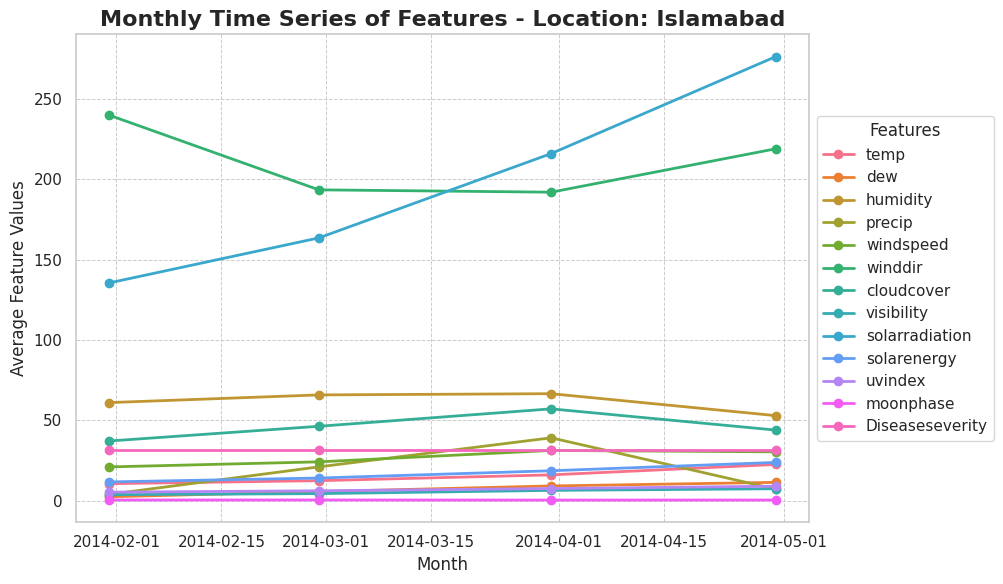

<ipython-input-7-6bbbc1b72c66>:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = numeric_df.resample('M').mean()


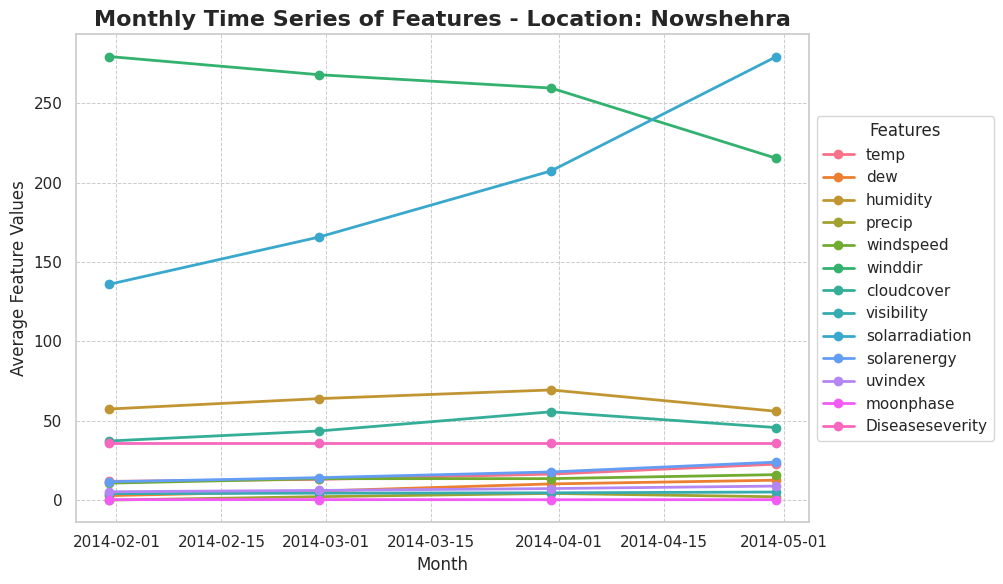

<ipython-input-7-6bbbc1b72c66>:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = numeric_df.resample('M').mean()


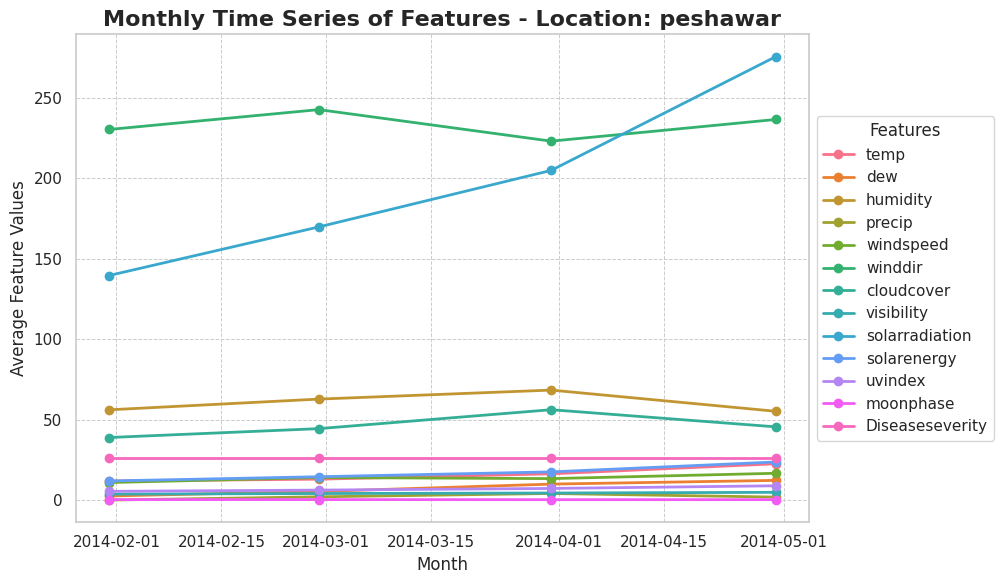

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the seaborn theme for better visuals
sns.set_theme(style="whitegrid")

# Load your dataset from the specified path
df = pd.read_csv('/content/cleaned_file.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Loop through each unique location and create a separate plot for each
for location in df['Location'].unique():

    # Filter the DataFrame for the current location
    location_df = df[df['Location'] == location]

    # Select only numeric columns (exclude object columns like "Variety", "Location")
    numeric_df = location_df.select_dtypes(include=['float64', 'int64'])

    # Resample the data by month, aggregating with mean
    monthly_df = numeric_df.resample('M').mean()

    # Create a new plot for this location
    plt.figure(figsize=(12, 6))

    # Use a colormap for distinguishing lines better
    colors = sns.color_palette("husl", len(monthly_df.columns))

    for idx, feature in enumerate(monthly_df.columns):
        plt.plot(monthly_df.index, monthly_df[feature], marker='o', linestyle='-', linewidth=2, color=colors[idx], label=feature)

    # Add titles and labels
    plt.title(f'Monthly Time Series of Features - Location: {location}', fontsize=16, fontweight='bold')
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Average Feature Values', fontsize=12)

    # Move the legend box outside the plot on the right
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Features')

    # Add a grid for better readability
    plt.grid(True, which='both', linestyle='--', linewidth=0.7)

    # Adjust layout to fit the legend and save the plot with a unique filename
    plt.tight_layout(rect=[0, 0, 0.85, 1])

    # Save the figure with the location name in the filename
    plt.savefig(f'Timeseries_features_location_{location}.png', dpi=600, bbox_inches='tight')

    # Show the plot
    plt.show()


<ipython-input-11-5557e6e939cf>:32: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Disease severity')  # Add color bar for Disease severity


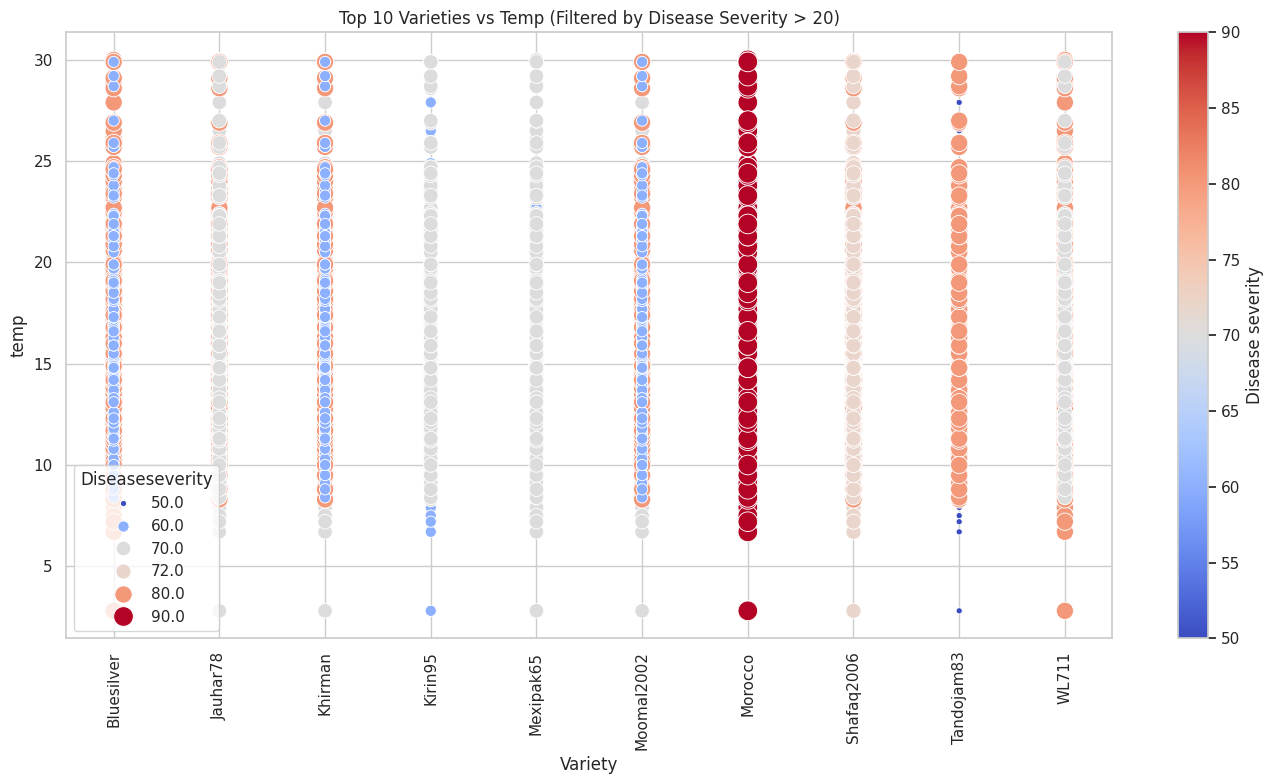

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the seaborn theme for better visuals
sns.set_theme(style="whitegrid")

# Set your disease severity threshold
severity_threshold = 20  # Example threshold, adjust as needed

# Filter the DataFrame for rows where Diseaseseverity is above the threshold
df_filtered = df[df['Diseaseseverity'] > severity_threshold]

# Find the top 10 varieties with the highest average disease severity
top_varieties = df_filtered.groupby('Variety')['Diseaseseverity'].mean().nlargest(10).index

# Filter the DataFrame to include only these top varieties
df_top_varieties = df_filtered[df_filtered['Variety'].isin(top_varieties)]

# Create the scatter plot for the filtered data (top 10 varieties)
plt.figure(figsize=(14, 8))

# Temperature vs Variety with color indicating Disease Severity levels
scatter = sns.scatterplot(x='Variety', y='temp', data=df_top_varieties,
                          hue='Diseaseseverity', palette='coolwarm',
                          size='Diseaseseverity', sizes=(20, 200))

# Adding the color bar using the scatter plot's collections
norm = plt.Normalize(df_top_varieties['Diseaseseverity'].min(), df_top_varieties['Diseaseseverity'].max())
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])  # Empty array for compatibility
plt.colorbar(sm, label='Disease severity')  # Add color bar for Disease severity

# Add titles and labels
plt.title("Top 10 Varieties vs Temp (Filtered by Disease Severity > 20)")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Save the figure as a PNG file
plt.savefig('Top10_Varieties_Vs_Diseaseseverity_filtered.png', dpi=600, bbox_inches='tight')

# Show the plot
plt.show()


In [ ]:
plt.subplot(1,2,2)
sns.scatterplot(x='Humidity', y='SO2', data=df)
plt.title("Humidity vs PM2.5")
plt.tight_layout()
plt.show()

# **2. Feature Importance**

Model Performance on Test Set:
Mean Squared Error (MSE): 676.9374
Root Mean Squared Error (RMSE): 26.0180
Mean Absolute Error (MAE): 22.9387
R² Score: 0.0054


<ipython-input-14-3f6d379f94ac>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When group

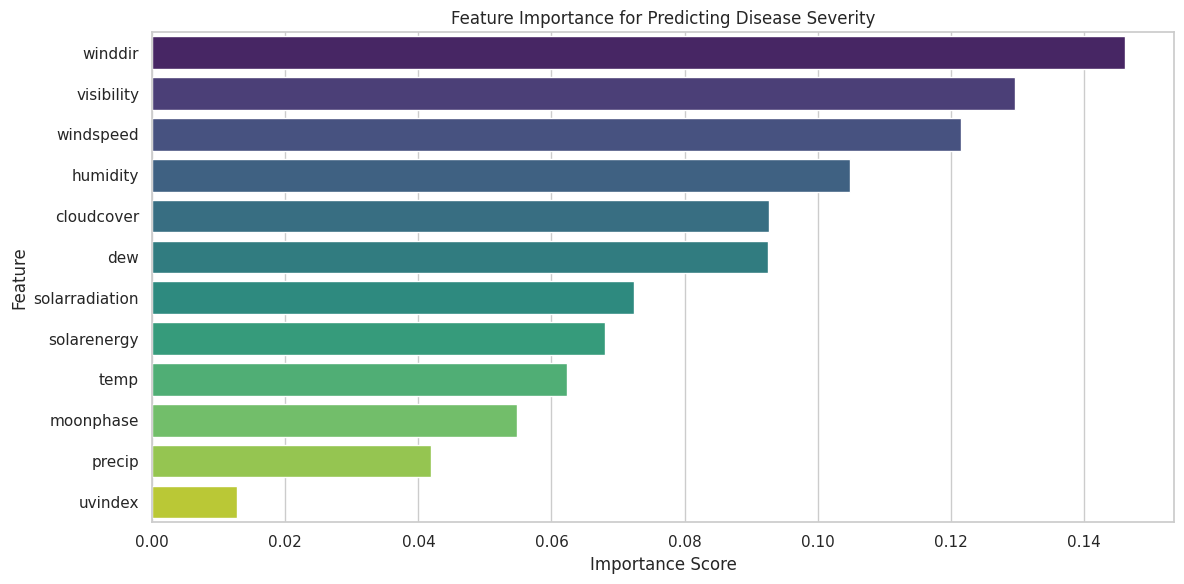

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Load your dataset from the specified path
df = pd.read_csv('/content/cleaned_file.csv')

# Define your features and target variable
X = df.drop(columns=['Diseaseseverity', 'Variety', 'Location', 'Date'])  # Exclude non-numeric features
y = df['Diseaseseverity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended for many models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print model performance
print(f"Model Performance on Test Set:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to hold feature names and their importance scores
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance for Predicting Disease Severity')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('Feature_Importance_Disease_Severity.png', dpi=600, bbox_inches='tight')
plt.show()


Mean Squared Error (MSE): 676.9374
Root Mean Squared Error (RMSE): 26.0180
Mean Absolute Error (MAE): 22.9387
R² Score: 0.0054

Here's an interpretation of these metrics:

MSE and RMSE: High values indicate significant differences between predicted and actual values. An RMSE of 26.0180 suggests that, on average, your model's predictions are off by approximately 26 units.

MAE: Similar to RMSE, a high MAE (22.9387) indicates significant prediction errors.

R² Score: Very low (0.0054), indicating that your model explains only a tiny fraction of the variance in the target variable. Values close to 1 are desirable.

Overall, these metrics suggest:

1. Your model is not accurately predicting the target variable.
2. There may be significant room for improvement.

Consider:

1. Data quality and preprocessing: Ensure data is clean, relevant, and properly scaled.
2. Feature engineering: Explore additional features or transform existing ones.
3. Model selection and tuning: Try different models or hyperparameters.
4. Regularization techniques: Address potential overfitting.
5. Cross-validation: Verify results using multiple folds.

## **Model Optimization or Search for the better model or Grid Search**

Training Random Forest...
Model Performance for Random Forest:
Mean Squared Error (MSE): 675.4460
Root Mean Squared Error (RMSE): 25.9893
Mean Absolute Error (MAE): 22.9498
R² Score: 0.0076


Training Gradient Boosting...
Model Performance for Gradient Boosting:
Mean Squared Error (MSE): 675.1701
Root Mean Squared Error (RMSE): 25.9840
Mean Absolute Error (MAE): 22.9940
R² Score: 0.0080


Training XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:26:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model Performance for XGBoost:
Mean Squared Error (MSE): 675.5685
Root Mean Squared Error (RMSE): 25.9917
Mean Absolute Error (MAE): 22.9979
R² Score: 0.0074


Training Linear Regression...
Model Performance for Linear Regression:
Mean Squared Error (MSE): 679.1598
Root Mean Squared Error (RMSE): 26.0607
Mean Absolute Error (MAE): 23.0455
R² Score: 0.0021




<ipython-input-15-56e0da5abc29>:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grou

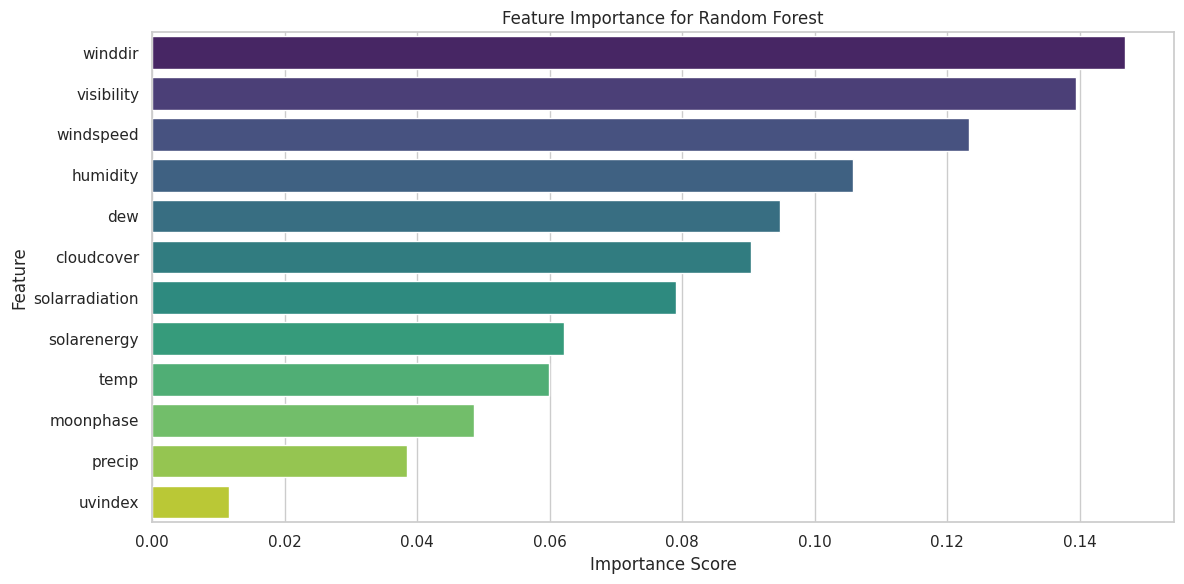

ValueError: Mixing dicts with non-Series may lead to ambiguous ordering.

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load your dataset
df = pd.read_csv('/content/cleaned_file.csv')

# Define features and target variable
X = df.drop(columns=['Diseaseseverity', 'Variety', 'Location', 'Date'])  # Exclude non-numeric features
y = df['Diseaseseverity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the models
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(use_label_encoder=False, eval_metric='rmse', random_state=42),
    'Linear Regression': LinearRegression()
}

# Hyperparameters for Grid Search
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'Linear Regression': {}  # No hyperparameters to tune for linear regression
}

# Dictionary to store the best models and their performances
best_models = {}
performance_metrics = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Perform Grid Search for hyperparameter tuning
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    # Get the best model and parameters
    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model

    # Predict on the test set
    y_pred = best_model.predict(X_test_scaled)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    performance_metrics[model_name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R² Score': r2
    }

    # Print model performance
    print(f"Model Performance for {model_name}:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R² Score: {r2:.4f}")
    print("\n")

# Optional: Visualize feature importance for Random Forest and XGBoost
for model_name in ['Random Forest', 'XGBoost']:
    if model_name in best_models:
        model = best_models[model_name]

        # Get feature importances
        feature_importances = model.feature_importances_ if model_name == 'Random Forest' else model.get_booster().get_score(importance_type='weight')

        # Create a DataFrame to hold feature names and their importance scores
        importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

        # Visualize feature importances
        plt.figure(figsize=(12, 6))
        sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
        plt.title(f'Feature Importance for {model_name}')
        plt.xlabel('Importance Score')
        plt.ylabel('Feature')
        plt.tight_layout()
        plt.savefig(f'Feature_Importance_{model_name}.png', dpi=600, bbox_inches='tight')
        plt.show()


Training Random Forest...
Model Performance for Random Forest:
Mean Squared Error (MSE): 675.4460
Root Mean Squared Error (RMSE): 25.9893
Mean Absolute Error (MAE): 22.9498
R² Score: 0.0076


Training Gradient Boosting...
Model Performance for Gradient Boosting:
Mean Squared Error (MSE): 675.1701
Root Mean Squared Error (RMSE): 25.9840
Mean Absolute Error (MAE): 22.9940
R² Score: 0.0080


Training XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:13:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model Performance for XGBoost:
Mean Squared Error (MSE): 675.5685
Root Mean Squared Error (RMSE): 25.9917
Mean Absolute Error (MAE): 22.9979
R² Score: 0.0074


Training Linear Regression...
Model Performance for Linear Regression:
Mean Squared Error (MSE): 679.1598
Root Mean Squared Error (RMSE): 26.0607
Mean Absolute Error (MAE): 23.0455
R² Score: 0.0021




<ipython-input-16-8a4255dbad29>:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grou

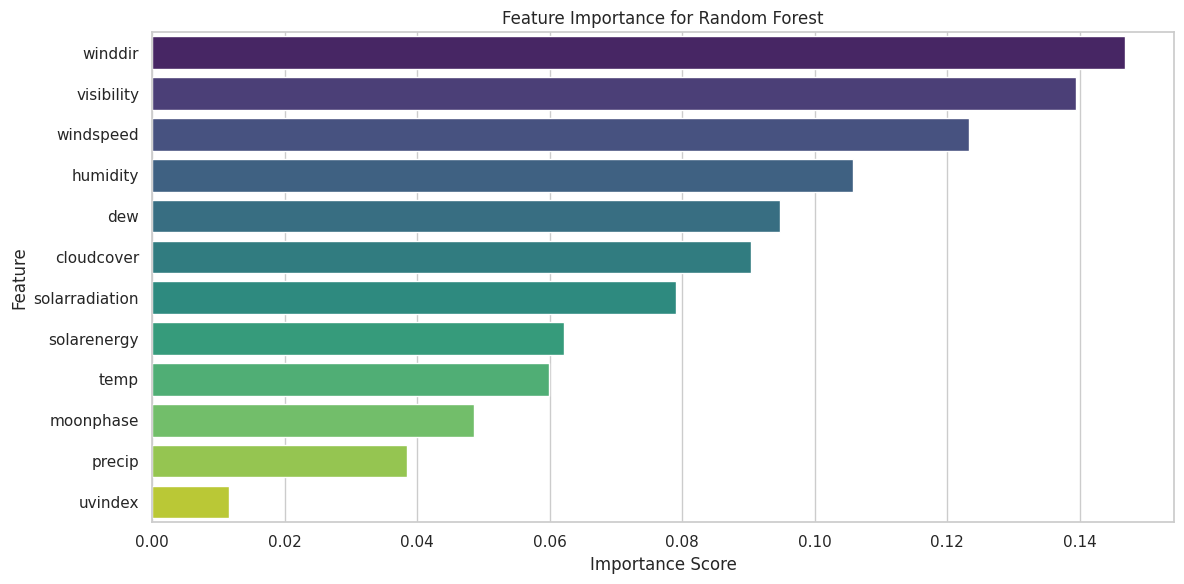

ValueError: array length 12 does not match index length 11

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load your dataset
df = pd.read_csv('/content/cleaned_file.csv')

# Define features and target variable
X = df.drop(columns=['Diseaseseverity', 'Variety', 'Location', 'Date'])  # Exclude non-numeric features
y = df['Diseaseseverity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the models
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(use_label_encoder=False, eval_metric='rmse', random_state=42),
    'Linear Regression': LinearRegression()
}

# Hyperparameters for Grid Search
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'Linear Regression': {}  # No hyperparameters to tune for linear regression
}

# Dictionary to store the best models and their performances
best_models = {}
performance_metrics = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Perform Grid Search for hyperparameter tuning
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    # Get the best model and parameters
    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model

    # Predict on the test set
    y_pred = best_model.predict(X_test_scaled)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print model performance
    performance_metrics[model_name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R² Score': r2
    }

    print(f"Model Performance for {model_name}:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R² Score: {r2:.4f}")
    print("\n")

# Optional: Visualize feature importance for Random Forest and XGBoost
for model_name in ['Random Forest', 'XGBoost']:
    if model_name in best_models:
        model = best_models[model_name]

        # Get feature importances
        if model_name == 'Random Forest':
            feature_importances = model.feature_importances_
        else:  # For XGBoost
            feature_importances = model.get_booster().get_score(importance_type='weight')
            # Convert to DataFrame format
            feature_importances = pd.Series(feature_importances).sort_values(ascending=False)

        # Create a DataFrame to hold feature names and their importance scores
        importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

        # Visualize feature importances
        plt.figure(figsize=(12, 6))
        sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
        plt.title(f'Feature Importance for {model_name}')
        plt.xlabel('Importance Score')
        plt.ylabel('Feature')
        plt.tight_layout()
        plt.savefig(f'Feature_Importance_{model_name}.png', dpi=600, bbox_inches='tight')
        plt.show()


In [ ]:
# Hyperparameter tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Predictions with the best model
y_pred = best_model.predict(X_test)

# Calculate and print RMSE for the best model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Optimized RMSE: {rmse:.2f}")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the best model
importances = best_model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('Feature_Importance_Random_Forest.png')  # Save the figure as a PNG file
plt.show()

# Display the DataFrame
print(feature_importance_df)

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Using only a few features for simplicity
X_simple = df[['PM2.5', 'Humidity', 'NO2', 'SO2']]  # Replace with your selected features
y_simple = df['Temperature']

# Cross-validation
lin_model = LinearRegression()
scores = cross_val_score(lin_model, X_simple, y_simple, cv=5, scoring='neg_mean_squared_error')
baseline_rmse = np.sqrt(-scores.mean())
print(f"Baseline Linear Regression RMSE: {baseline_rmse:.2f}")

In [ ]:
# Fit the linear model
lin_model.fit(X_simple, y_simple)

# Get the coefficients and feature names
coefficients = lin_model.coef_
features = X_simple.columns

# Create a DataFrame for feature importance
linear_importance_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=linear_importance_df)
plt.title('Feature Importance from Linear Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.axvline(0, color='gray', linestyle='--')  # Line at zero for reference
plt.savefig('Feature_Importance_Linear Regression.png')  # Save the figure as a PNG file
plt.show()

# Display the DataFrame
print(linear_importance_df)

**Let's try another Model - gradient boosting**

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}

xgb_search = RandomizedSearchCV(XGBRegressor(objective='reg:squarederror', random_state=42),
                                param_distributions, n_iter=10, cv=5, scoring='neg_mean_squared_error')
xgb_search.fit(X_train, y_train)

best_xgb = xgb_search.best_estimator_

# Predictions and RMSE calculation
y_pred_xgb = best_xgb.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f"Optimized XGBoost RMSE: {rmse_xgb:.2f}")

In [ ]:
# Get feature importances from the best XGBoost model
xgb_importances = best_xgb.feature_importances_

# Create a DataFrame for feature importance
xgb_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_importance_df)
plt.title('Feature Importance from XGBoost')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('Feature_Importance_XGB.png')  # Save the figure as a PNG file
plt.show()

# Display the DataFrame
print(xgb_importance_df)

## **3. Classification Task**
We could frame our problem as a classification task, for example:

**Classifying pollution levels:** Define thresholds for pollutants (e.g., "low", "medium", "high") and predict the air quality category based on the input features.

**Anomaly Detection:** Use classification models to detect unusual spikes in pollutants (outliers).

Here, we will Label the SO2 column to Low, medium, and high.

LOW = < 15

MEDIUM = > 15 < 40

HIGH = > 40

In [ ]:
import pandas as pd

# Assuming df is your DataFrame and SO2 is a numeric column
def label_so2(value):
    if value < 16:
        return 'Low'
    elif 15 < value <= 40:
        return 'Medium'
    else:
        return 'High'

# Apply the function to create a new column
df['SO2_Label'] = df['SO2'].apply(label_so2)

# Check the new column
print(df[['SO2', 'SO2_Label']].head())

In [ ]:
# Prepare your data
X = df.drop(columns=['SO2_Label', 'Date', 'Full_Date', 'Year'])  # Exclude unwanted columns
y = df['SO2_Label']  # Use the new label as your target variable

# Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Feature importance (if needed)
importances = clf.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
sns.countplot(x='SO2_Label', data=df)
plt.title('Distribution of SO2 Labels')
plt.savefig('Distribution_of_SO2.png')  # Save the figure as a PNG file
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='SO2_Label', y='NO2', data=df)
plt.title('NO2 Vs SO2 Label')
plt.savefig('No2VsSo2.png')  # Save the figure as a PNG file
plt.show()

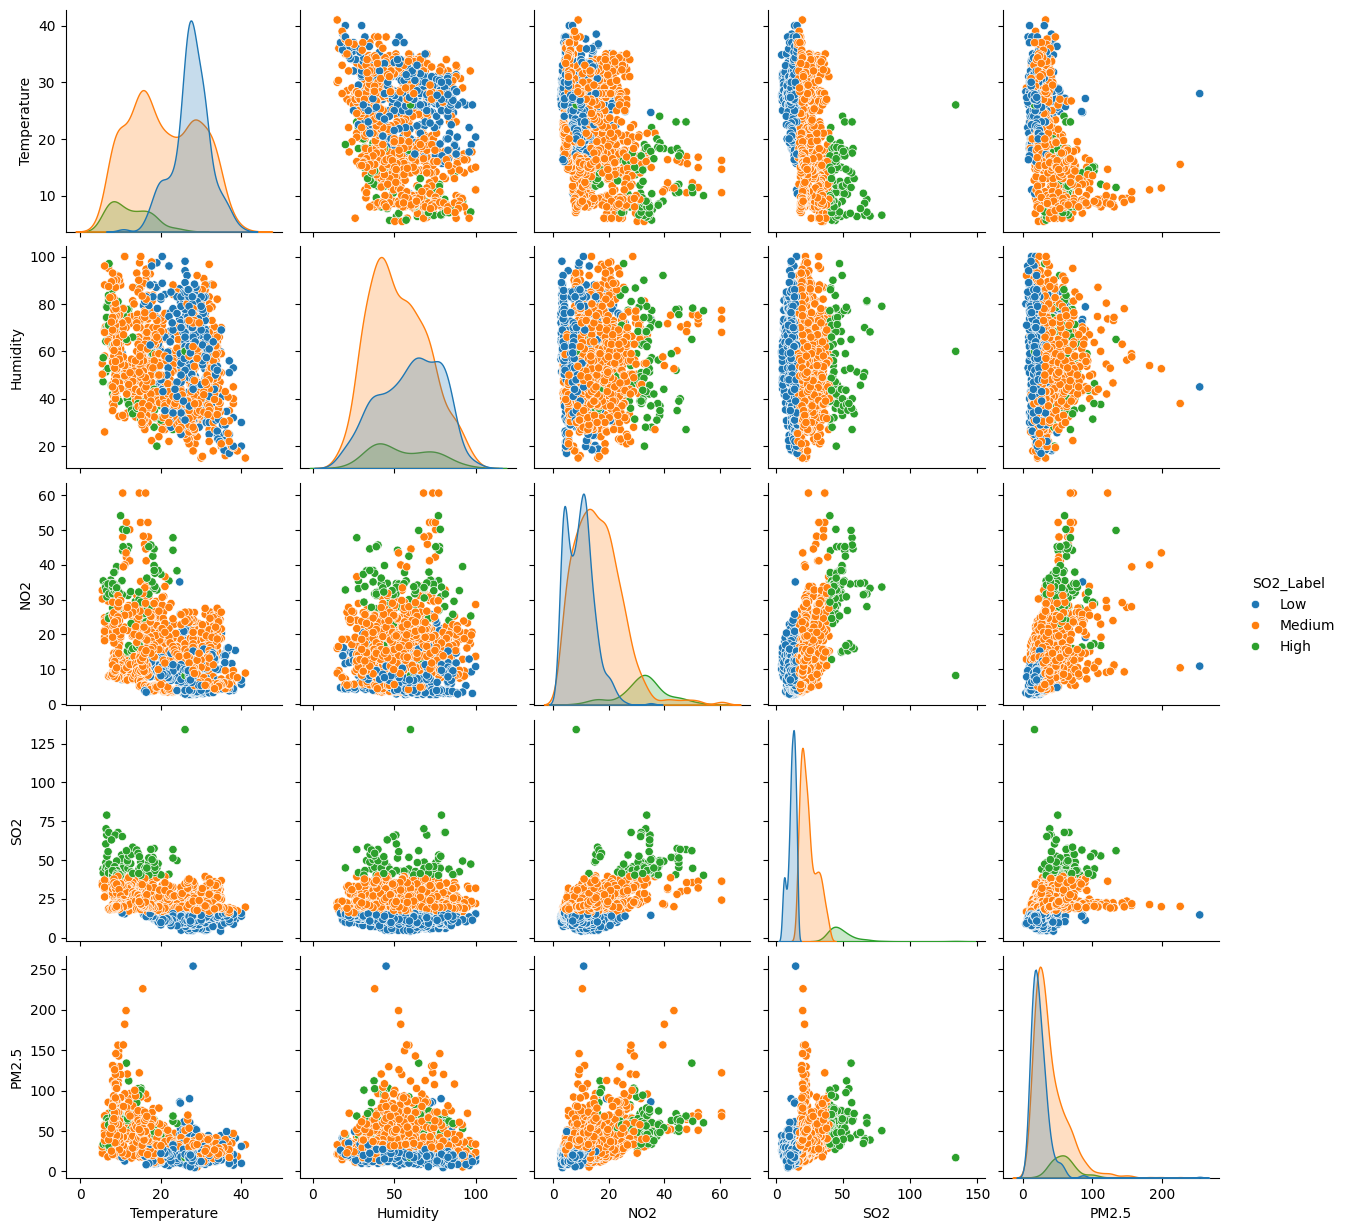

In [ ]:
sns.pairplot(df, hue='SO2_Label')
plt.savefig('SO2_label_vs_others.png')  # Save the figure as a PNG file
plt.show()

**Congratulations!** Today you have learned something new atleast